In [3]:
import pandas as pd
import numpy as np
import json
import ast

# Import Pandas for data manipulation purposes 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Decision TREES
from sklearn.tree import DecisionTreeClassifier

# regularized regression with Ridge absolute value alpha
from sklearn.linear_model import Lasso


#for confusion matrix
from sklearn.metrics import confusion_matrix
#for having clasification reports
from sklearn.metrics import classification_report
#ROC curve for analyzing Logistic regression
from sklearn.metrics import roc_curve
# Cross Validation Score
from sklearn.model_selection import cross_val_score
# Calculate AUC Score
from sklearn.metrics import roc_auc_score

# Correlation Matrix

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [48]:
file = open("C:/Users/malipourmotlagh1/Desktop/mot/ABSOLUTE MEAN/MOTENAQEZ/Transactions fraud detection/Data/transactions - Copy - Copy.txt")

In [49]:
all_text=[]
for i in range(0,786363):
    content=[]
    content = file.readlines(i)
    all_text.append(content)

In [50]:
all_text[0][0]

'{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-08-13T14:27:32", "transactionAmount": 98.55, "merchantName": "Uber", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "02", "posConditionCode": "01", "merchantCategoryCode": "rideshare", "currentExpDate": "06/2023", "accountOpenDate": "2015-03-14", "dateOfLastAddressChange": "2015-03-14", "cardCVV": "414", "enteredCVV": "414", "cardLast4Digits": "1803", "transactionType": "PURCHASE", "echoBuffer": "", "currentBalance": 0.0, "merchantCity": "", "merchantState": "", "merchantZip": "", "cardPresent": false, "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}\n'

In [51]:
all_text[0][1][0:-1]

'{"accountNumber": "737265056", "customerId": "737265056", "creditLimit": 5000.0, "availableMoney": 5000.0, "transactionDateTime": "2016-10-11T05:05:54", "transactionAmount": 74.51, "merchantName": "AMC #191138", "acqCountry": "US", "merchantCountryCode": "US", "posEntryMode": "09", "posConditionCode": "01", "merchantCategoryCode": "entertainment", "cardPresent": true, "currentExpDate": "02/2024", "accountOpenDate": "2015-03-14", "dateOfLastAddressChange": "2015-03-14", "cardCVV": "486", "enteredCVV": "486", "cardLast4Digits": "767", "transactionType": "PURCHASE", "echoBuffer": "", "currentBalance": 0.0, "merchantCity": "", "merchantState": "", "merchantZip": "", "posOnPremises": "", "recurringAuthInd": "", "expirationDateKeyInMatch": false, "isFraud": false}'

In [52]:
len(all_text)

786363

In [53]:
dicts=[]
for i in range(0,786359):
    dict=all_text[0][i][0:-1]
    dict=json.loads(dict)
    dicts.append(dict)

In [54]:
transactions=pd.DataFrame(dicts)
transactions.to_csv('C:/Users/malipourmotlagh1/Desktop/mot/ABSOLUTE MEAN/MOTENAQEZ/Transactions fraud detection/Data/transactions.csv')

In [55]:
transactions=pd.read_csv('C:/Users/malipourmotlagh1/Desktop/mot/ABSOLUTE MEAN/MOTENAQEZ/Transactions fraud detection/Data/transactions.csv')
transactions.head()

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [56]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786359 entries, 0 to 786358
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                786359 non-null  int64  
 1   accountNumber             786359 non-null  int64  
 2   customerId                786359 non-null  int64  
 3   creditLimit               786359 non-null  float64
 4   availableMoney            786359 non-null  float64
 5   transactionDateTime       786359 non-null  object 
 6   transactionAmount         786359 non-null  float64
 7   merchantName              786359 non-null  object 
 8   acqCountry                781797 non-null  object 
 9   merchantCountryCode       785635 non-null  object 
 10  posEntryMode              782305 non-null  float64
 11  posConditionCode          785950 non-null  float64
 12  merchantCategoryCode      786359 non-null  object 
 13  currentExpDate            786359 non-null  o

In [57]:
transactions.groupby('customerId')['accountNumber'].count()

customerId
100088067     75
100108752     18
100328049    103
100663626     31
100737756    178
            ... 
999086814    677
999257059    160
999258704     88
999283629    141
999389635      9
Name: accountNumber, Length: 5000, dtype: int64

In [59]:
#creditLimit
transactions.groupby('creditLimit')['creditLimit'].count()


creditLimit
250.0       34025
500.0       27097
1000.0      36430
2500.0      75429
5000.0     201863
7500.0      97913
10000.0     56889
15000.0    139307
20000.0     68629
50000.0     48777
Name: creditLimit, dtype: int64

In [60]:
#availableMoney
transactions.groupby('availableMoney')['availableMoney'].count()


availableMoney
-1005.63        1
-972.12         1
-936.08         1
-930.55         1
-916.03         1
             ... 
 49998.89       1
 49999.43       1
 49999.62       1
 49999.72       1
 50000.00    1207
Name: availableMoney, Length: 521858, dtype: int64

In [61]:
#acqCountry
transactions.groupby('acqCountry')['acqCountry'].count()


acqCountry
CAN      2424
MEX      3130
PR       1538
US     774705
Name: acqCountry, dtype: int64

In [62]:
#posEntryMode
transactions.groupby('posEntryMode')['posEntryMode'].count()


posEntryMode
2.0     195933
5.0     315034
9.0     236479
80.0     15283
90.0     19576
Name: posEntryMode, dtype: int64

In [63]:
#posConditionCode
transactions.groupby('posConditionCode')['posConditionCode'].count()


posConditionCode
1.0     628784
8.0     149634
99.0      7532
Name: posConditionCode, dtype: int64

In [64]:
#merchantCategoryCode
transactions.groupby('merchantCategoryCode')['merchantCategoryCode'].count()


merchantCategoryCode
airline                  15412
auto                     21651
cable/phone               1382
entertainment            80098
fastfood                112138
food                     75490
food_delivery             6000
fuel                     23910
furniture                 7432
gym                       2209
health                   19092
hotels                   34097
mobileapps               14990
online_gifts             66238
online_retail           202155
online_subscriptions     11066
personal care            18964
rideshare                51134
subscriptions            22901
Name: merchantCategoryCode, dtype: int64

In [65]:
#transactionType
transactions.groupby('transactionType')['transactionType'].count()


transactionType
ADDRESS_VERIFICATION     20169
PURCHASE                745189
REVERSAL                 20303
Name: transactionType, dtype: int64

In [66]:
#echoBuffer
transactions.groupby('echoBuffer')['echoBuffer'].count()


Series([], Name: echoBuffer, dtype: int64)

In [67]:
transactions['echoBuffer']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
786354   NaN
786355   NaN
786356   NaN
786357   NaN
786358   NaN
Name: echoBuffer, Length: 786359, dtype: float64

In [68]:
#merchantCity
transactions.groupby('merchantCity')['merchantCity'].count()


Series([], Name: merchantCity, dtype: int64)

In [69]:
transactions['merchantCity']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
786354   NaN
786355   NaN
786356   NaN
786357   NaN
786358   NaN
Name: merchantCity, Length: 786359, dtype: float64

In [70]:
#merchantState
transactions.groupby('merchantState')['merchantState'].count()


Series([], Name: merchantState, dtype: int64)

In [71]:
#merchantZip
transactions.groupby('merchantZip')['merchantZip'].count()


Series([], Name: merchantZip, dtype: int64)

In [72]:
#cardPresent
transactions.groupby('cardPresent')['cardPresent'].count()


cardPresent
False    433491
True     352868
Name: cardPresent, dtype: int64

In [73]:
#posOnPremises
transactions.groupby('posOnPremises')['posOnPremises'].count()


Series([], Name: posOnPremises, dtype: int64)

In [74]:
#recurringAuthInd
transactions.groupby('recurringAuthInd')['recurringAuthInd'].count()


Series([], Name: recurringAuthInd, dtype: int64)

In [75]:
#expirationDateKeyInMatch
transactions.groupby('expirationDateKeyInMatch')['expirationDateKeyInMatch'].count()

expirationDateKeyInMatch
False    785316
True       1043
Name: expirationDateKeyInMatch, dtype: int64

In [76]:
#isFraud
transactions.groupby('isFraud')['isFraud'].count()

isFraud
False    773942
True      12417
Name: isFraud, dtype: int64

In [77]:
transactions=transactions.drop(['echoBuffer','merchantZip','merchantCity','merchantState','posOnPremises','recurringAuthInd'],axis=1)

In [78]:
transactions.head()

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [79]:
transactions.to_csv('C:/Users/malipourmotlagh1/Desktop/mot/ABSOLUTE MEAN/MOTENAQEZ/Transactions fraud detection/Data/transactionsclean.csv')

In [80]:
transactions=pd.read_csv('C:/Users/malipourmotlagh1/Desktop/mot/ABSOLUTE MEAN/MOTENAQEZ/Transactions fraud detection/Data/transactionsclean.csv')


,Unnamed: 0,Unnamed: 0.1,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,0,0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,...,2015-03-14 00:00:00,2015-03-14 00:00:00,414,414,1803,PURCHASE,0.0,False,False,False
1,1,1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,...,2015-03-14 00:00:00,2015-03-14 00:00:00,486,486,767,PURCHASE,0.0,True,False,False
2,2,2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,...,2015-03-14 00:00:00,2015-03-14 00:00:00,486,486,767,PURCHASE,0.0,False,False,False
3,3,3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,...,2015-03-14 00:00:00,2015-03-14 00:00:00,486,486,767,PURCHASE,0.0,False,False,False
4,4,4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,...,2015-08-06 00:00:00,2015-08-06 00:00:00,885,885,3143,PURCHASE,0.0,True,False,False


In [86]:
transactions=transactions.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [91]:
#converting type of relevant columns ti date time
transactions['currentExpDate']=pd.to_datetime(transactions['currentExpDate'])
transactions['accountOpenDate']=pd.to_datetime(transactions['accountOpenDate'])
transactions['transactionDateTime']=pd.to_datetime(transactions['transactionDateTime'])
transactions['dateOfLastAddressChange']=pd.to_datetime(transactions['dateOfLastAddressChange'])

In [87]:
transactions.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,...,2015-03-14 00:00:00,2015-03-14 00:00:00,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,...,2015-03-14 00:00:00,2015-03-14 00:00:00,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,...,2015-03-14 00:00:00,2015-03-14 00:00:00,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,...,2015-03-14 00:00:00,2015-03-14 00:00:00,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,2015-08-06 00:00:00,2015-08-06 00:00:00,885,885,3143,PURCHASE,0.0,True,False,False


In [92]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786359 entries, 0 to 786358
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786359 non-null  int64         
 1   customerId                786359 non-null  int64         
 2   creditLimit               786359 non-null  float64       
 3   availableMoney            786359 non-null  float64       
 4   transactionDateTime       786359 non-null  datetime64[ns]
 5   transactionAmount         786359 non-null  float64       
 6   merchantName              786359 non-null  object        
 7   acqCountry                781797 non-null  object        
 8   merchantCountryCode       785635 non-null  object        
 9   posEntryMode              782305 non-null  float64       
 10  posConditionCode          785950 non-null  float64       
 11  merchantCategoryCode      786359 non-null  object        
 12  cu

In [83]:
custid=['customerId']
acountnumber=['accountNumber']
target=['isFraud']


In [85]:
categorical=transactions.nunique()[transactions.nunique()<20].keys().tolist()
categorical.remove(target[0])
categorical

['creditLimit',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'transactionType',
 'cardPresent',
 'expirationDateKeyInMatch']

In [101]:
date_cols=transactions.dtypes[transactions.dtypes=="datetime64[ns]"].keys().tolist()
date_cols

['transactionDateTime',
 'currentExpDate',
 'accountOpenDate',
 'dateOfLastAddressChange']

In [103]:
numerical=[col for col in transactions.columns
            if col not in custid+target+categorical+date_cols+acountnumber]
numerical

['availableMoney',
 'transactionAmount',
 'merchantName',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'currentBalance']

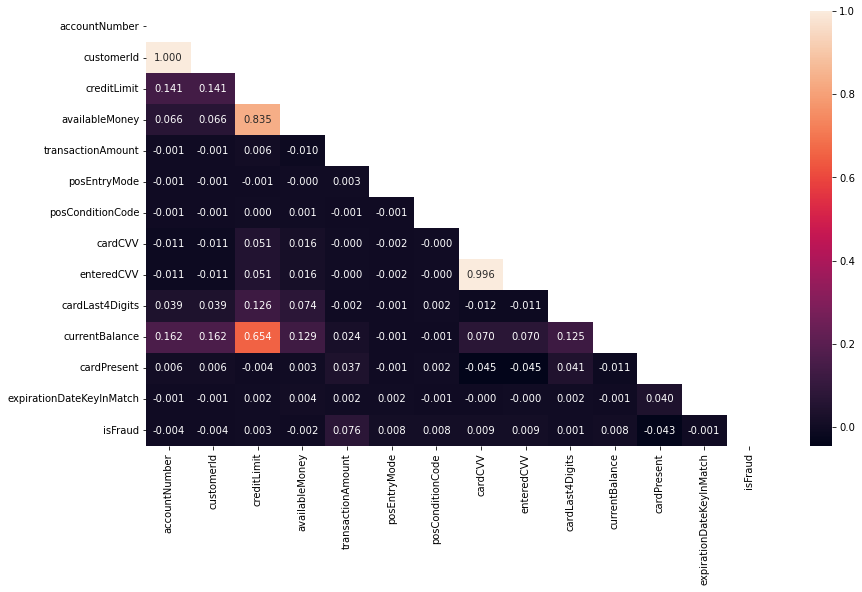

In [104]:
# Compute the correlation matrix
corr = transactions.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap
fig = plt.figure(figsize=(14,8))
sns.heatmap(corr, annot = True,  fmt='.3f', mask = mask)
plt.show()

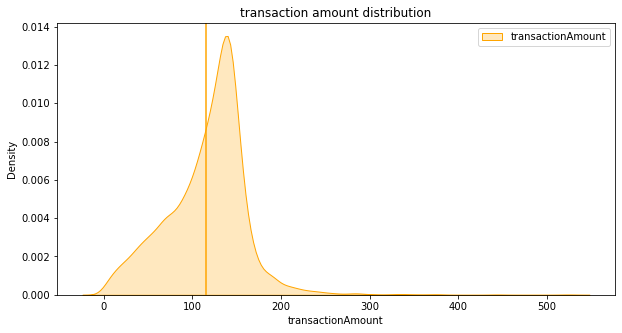

In [109]:
plt.figure(figsize=(10,5))
sns.kdeplot(transactions.groupby('customerId')['transactionAmount'].mean(), shade=True, color="orange",label="transactionAmount")
plt.axvline(transactions.groupby('customerId')['transactionAmount'].mean().mean(), color='orange')
plt.legend()
plt.title("transaction amount distribution per customer")
plt.show()

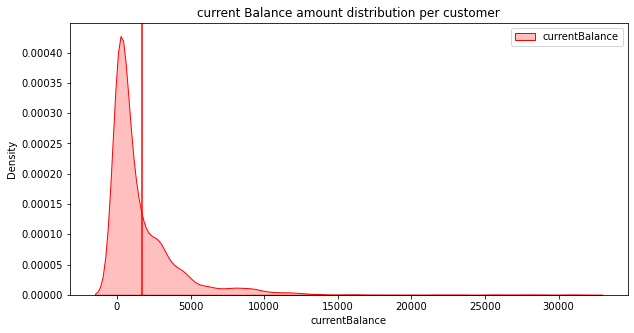

In [113]:
plt.figure(figsize=(10,5))
sns.kdeplot(transactions.groupby('customerId')['currentBalance'].mean(), shade=True, color="red",label="currentBalance")
plt.axvline(transactions.groupby('customerId')['currentBalance'].mean().mean(), color='red')
plt.legend()
plt.title("current Balance amount distribution per customer")
plt.show()

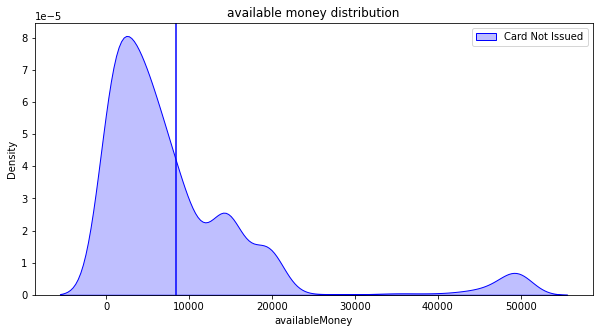

In [108]:
plt.figure(figsize=(10,5))
sns.kdeplot(transactions.groupby('customerId')['availableMoney'].mean(), shade=True, color="b",label="availableMoney")
plt.axvline(transactions.groupby('customerId')['availableMoney'].mean().mean(), color='b')
plt.legend()
plt.title("available money distribution per customer")
plt.show()

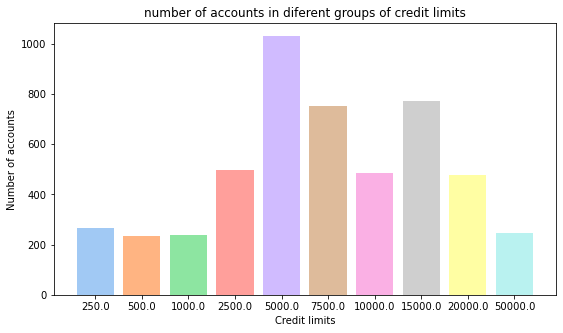

In [138]:
# Card issued by account_length
fig, ax = plt.subplots(figsize=(9, 5))
x= transactions.groupby('creditLimit')['accountNumber'].nunique().values
y= transactions.groupby('creditLimit')['creditLimit'].count().index
y=y.astype(str)
ax.set_title('number of accounts in diferent groups of credit limits')
plt.bar(y,x,color=sns.color_palette("pastel",len(x)))
ax.set_xlabel('Credit limits')
ax.set_ylabel('Number of accounts')
plt.show()

In [131]:
x

array([ 265,  234,  240,  499, 1031,  750,  484,  773,  478,  246],
      dtype=int64)

In [132]:
y

Float64Index([  250.0,   500.0,  1000.0,  2500.0,  5000.0,  7500.0, 10000.0,
              15000.0, 20000.0, 50000.0],
             dtype='float64', name='creditLimit')

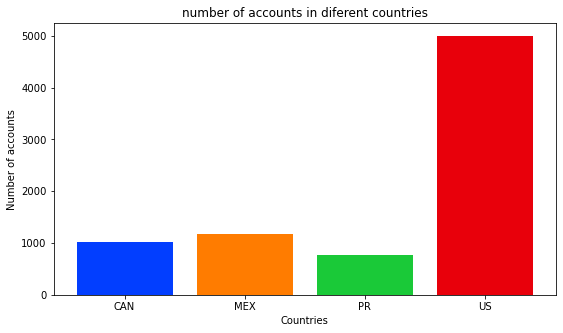

In [142]:
# Card issued by account_length
fig, ax = plt.subplots(figsize=(9, 5))
x= transactions.groupby('acqCountry')['accountNumber'].nunique().values
y= transactions.groupby('acqCountry')['acqCountry'].count().index
y=y.astype(str)
ax.set_title('number of accounts in diferent countries')
plt.bar(y,x,color=sns.color_palette("bright",len(x)))
ax.set_xlabel('Countries')
ax.set_ylabel('Number of accounts')
plt.show()

In [143]:
transactions.groupby('acqCountry')['acqCountry'].count().index

Index(['CAN', 'MEX', 'PR', 'US'], dtype='object', name='acqCountry')

In [145]:
transactions.groupby('merchantCountryCode')['merchantCountryCode'].count()

merchantCountryCode
CAN      2426
MEX      3143
PR       1559
US     778507
Name: merchantCountryCode, dtype: int64

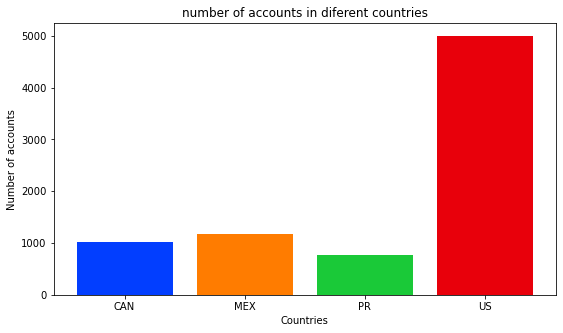

In [146]:
# Card issued by account_length
fig, ax = plt.subplots(figsize=(9, 5))
x= transactions.groupby('merchantCountryCode')['accountNumber'].nunique().values
y= transactions.groupby('merchantCountryCode')['merchantCountryCode'].count().index
y=y.astype(str)
ax.set_title('number of accounts in diferent countries')
plt.bar(y,x,color=sns.color_palette("bright",len(x)))
ax.set_xlabel('Countries')
ax.set_ylabel('Number of accounts')
plt.show()